In [1]:
import matplotlib.pyplot as plt
import os 
import pandas as pd

In [4]:
cifdir = 'datas/cifdirs/sort_volume_ciffiles_top_100'
target_dir = 'result/sort_volume_ciffiles_top_100'
#target_enegy =  'Total GULP energy'
target_enegy =  'GULP energy per Si atom'


# Get the list of cif files

# Get target file


target_df = pd.read_csv(os.path.join(target_dir, 'target_dirs.csv'), index_col=0)

cif_energy_dict = {}
# Get energy and volume
for i in range(len(target_df)):
    #path = target_df.iloc[i]['cifaddress']
    cifid = target_df.iloc[i]['cifid']
    path = os.path.join(cifdir, f'{cifid}.cif')
    for text in open(path, 'r').readlines():
        if target_enegy in text:
            cif_energy_dict[cifid] = float(text.split()[-2])
            break
cif_energy_df = pd.DataFrame.from_dict(cif_energy_dict, orient='index', columns=[target_enegy]).reset_index().rename(columns={'index':'cifid'})

#Get DCA point
dca_point_df = pd.read_csv(os.path.join(target_dir, 'cifpoint'), index_col=0)


# Merge
cif_energy_df = cif_energy_df.merge(dca_point_df, on='cifid')

datas/cifdirs/sort_volume_ciffiles_top_100/8000219.cif
datas/cifdirs/sort_volume_ciffiles_top_100/8000277.cif
datas/cifdirs/sort_volume_ciffiles_top_100/8045302.cif
datas/cifdirs/sort_volume_ciffiles_top_100/8000008.cif
datas/cifdirs/sort_volume_ciffiles_top_100/8000012.cif
datas/cifdirs/sort_volume_ciffiles_top_100/8000023.cif
datas/cifdirs/sort_volume_ciffiles_top_100/8000049.cif
datas/cifdirs/sort_volume_ciffiles_top_100/8000056.cif
datas/cifdirs/sort_volume_ciffiles_top_100/8000095.cif
datas/cifdirs/sort_volume_ciffiles_top_100/8000104.cif
datas/cifdirs/sort_volume_ciffiles_top_100/8000105.cif
datas/cifdirs/sort_volume_ciffiles_top_100/8000118.cif
datas/cifdirs/sort_volume_ciffiles_top_100/8000149.cif
datas/cifdirs/sort_volume_ciffiles_top_100/8000174.cif
datas/cifdirs/sort_volume_ciffiles_top_100/8000181.cif
datas/cifdirs/sort_volume_ciffiles_top_100/8000185.cif
datas/cifdirs/sort_volume_ciffiles_top_100/8000187.cif
datas/cifdirs/sort_volume_ciffiles_top_100/8000197.cif
datas/cifd

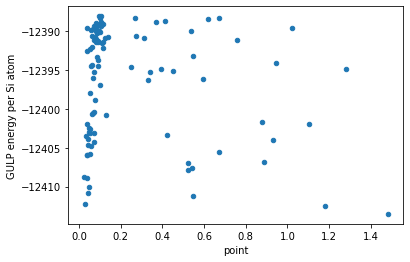

In [ ]:
cif_energy_df.plot.scatter(x = 'point', y = target_enegy)
plt.show()